*SIO221a Notes - Alford and Gille*

*Reading: Bendat and Piersol Ch. 4.2.2*

Concepts covered: Spectra and their uncertainties; Parseval's theorem for spectra; Fourier transform of a boxcar

# Lecture 10

#### Recap

So far this class has looked at methods for computing spectra.  We made sure that we understood
how to normalize our amplitudes, we segmented data so that we'd have
something to average, and we detrended to remove the bias associated with large-scale trends.
We've also identified the 
the lowest resolved frequency and the Nyquist frequency (the highest frequency
for which we have any information.)  We've almost managed to produce useful spectra,
but we need to assign error bars and figure out how many degrees of freedom we have,
and we need to make sure that everything is normalized correctly and add units.
We'll also need to put a little consideration into edge effects. 


In [142]:
%Nominal example: 
%First I'll need to pull the new function to my local working directory.
%[f,P]=Class_Spectrum_MHA(data,time,M);

%loglog(f,P);
%grid


#### Spectral Uncertainties

The problem with all of the spectra that we've computed so far
(the amplitude of the Fourier Transform) is
that we have no way to evaluate the uncertainty. By eye we can see
that it's fairly noisy.  We know from computing means that the error of the
mean decreases as we average more quantities together.

How do we incorporate
more data into our spectra?  You might imagine that you could improve
your spectrum by extending the input time series from $N$ to $2N$ data points
for example.  Unfortunately, although adding data points will change your
spectrum, it won't reduce your noise or make the spectrum more precise at
any individual frequency.  Instead it will increase the number of frequencies
for which you obtain results from $N/2$ to $N$.

Error bars for
spectra rely on a principle similar to what we used when we
estimated the standard error of the mean.  Our uncertainties in our spectra
decrease as we average more spectra together.  The challenge is to figure
out how to obtain more spectra that can be averaged together.  Typically
what we do is to break our time series into segments, compute spectra
for each of the segments, and average these to get a mean spectrum.  Since
we're averaging squared quantities (the spectral amplitudes) the distribution
of the sum will follow a $\chi^2$ distribution.  And we'll use this to
estimate the uncertainties.
When we compute our estimate of the spectrum of our data, we'll compute
coefficients $a(f)$, and for $M$ segments, at frequency $f$,
the estimated spectrum will be
$$
\hat{E}(f) = \langle |a(f)|^2\rangle = \frac{1}{n}\sum_{i=1}^{n} |a(f)|^2
$$

(Since we actually had two degrees of freedom for each segment, this will give
us $\nu = 2n$ degrees of freedom.)

Now to estimate errors the whole argument stems from a notion that there is a true spectrum $E(f)$, which we don't know, and our best estimate $\hat E(f)$, that we've
computed, but which might be noisy.  We could consider the difference
between $E$ and $\hat{E}$, but  this gets hairy quickly.  Besides we're
going to look at our results in log/log space anyway.  So let's look at the
ratio of the two.  Recall that $\ln(\hat{E}/E) = \ln(\hat{E})-\ln(E)$.
We can define a variable that represents this sum of squares normalized by
the true spectrum

$$
y = \nu\frac{\hat{E}_\nu(f)}{E(f)}
$$

where $\hat{E}_\nu$ is our best estimate of the spectrum from real observations,
when we have $\nu$ degrees of freedom.  

The spectrum is an average (or sum) of squared amplitudes, which
means that the ratio of $\hat{E}$ to $E(f)$ should have a
$\chi^2$ distribution with $\nu$ degrees of freedom.  Thus we'll always consider the ratio $\hat E(f)/E(f)$, where we use $\nu/2$ data segments.


Even though we don't know $E$, we know that the ratio of $\hat{E}$ to $E$
($\hat{E}/E$) should be about 1.  The spectrum is an average (or sum) of squared amplitudes, which
makes it
a $\chi^2$ quantity, and since $\chi^2$ statistics have an expectation value corresponding to the number of degrees
of freedom, it turns out to be convenient to scale it by $\nu$, so that $y$ has an expectation value of $\nu$. 
The standard deviation is $\langle y^2\rangle - \langle y\rangle^2 = 2\nu$ (see
Bendat and Piersol, section 4.2.2).
From that we can infer that with two
degrees of freedom, the standard deviation $\langle\hat{E}^2\rangle -
\langle\hat{E}\rangle^2 = 2/\nu E_0^2 = E_0^2$, which means that
the standard deviation is equal to the original value.  Clearly we need more
samples.

Now in reality, we don't care about the details of $\chi^2$ but rather the probability that
our estimate of the spectrum $\hat{E}$ is close to or far from the unknown
true spectrum $E$, so
we're going to look at the probability that  $\nu \hat E(f)/E(f)$
falls within a fixed range.  So we want to use the  $\chi^2$ distribution as
a probability distribution and ask about the probability that  $\hat E(f)/E(f)$ should be within $\pm$ some range of 1.
Formally, the probability that the estimated spectrum should be close
in value to the true spectrum is:

$$
P\left(\chi_{\nu,1-\alpha/2}^2 < \nu \frac{\hat E(f)}{E(f)} <
\chi_{\nu,\alpha/2}^2\right)  = 1-\alpha
$$

so if we want to find a 95\% significance level, we set $\alpha$ to 0.05.
We'll want to know the value of $\chi^2$ that corresponds to a given
point on the cdf, so for this we use the inverse $\chi^2$ function (''chi2inv''
in Matlab).
So we can invert this relationship to provide the probability that the true value is
within a particular range of the observed value:

$$
P\left(\frac{\chi_{\nu,1-\alpha/2}^2}{\nu} < \frac{\hat E(f)}{E(f)} <
\frac{\chi_{\nu,\alpha/2}^2}{\nu}\right) = 1-\alpha
$$

$$
P\left(\frac{\nu}{\chi_{\nu,1-\alpha/2}^2} > \frac{E(f)}{\hat E(f)} >
\frac{\nu}{\chi_{\nu,\alpha/2}^2}\right) = 1-\alpha
$$

$$
P\left(\frac{\nu \hat{E}(f)}{\chi_{\nu,1-\alpha/2}^2} > E(f) >
\frac{\nu \hat{E}(f)}{\chi_{\nu,\alpha/2}^2}\right) = 1-\alpha
$$

$$
P\left(\frac{\nu}{\chi_{\nu,\alpha/2}^2} < \frac{E(f)}{\hat E(f)} <
\frac{\nu}{\chi_{\nu,1-\alpha/2}^2}\right) = 1-\alpha
$$

Whether you use $\chi^2$ or its reciprocal, the ratio between the high and low
error bars should be the same, and the ratio will be what matters.



This error formulation differs from the usual error bars that we're used
to seeing where we say for example that the true temperature should be
the measured temperature plus or minus an uncertainty:  $T = \hat T \pm
\delta_T$.   We can develop a similar expression for the true spectrum:
$E(f)$ is in the range between
$\nu \hat E(f)/\chi_{\nu,\alpha/2}^2$ and
$\nu \hat E(f)/\chi_{\nu,1-\alpha/2}^2$,
where $\nu$ is twice the number of segments.
This expression isn't very easy to interpret, since it varies
as a function of frequency, and the estimated value $\hat E(f)$ is
not  at the mid-point of the range.

Instead we'll keep in mind that we've computed the uncertainty for
the ratio $\hat E(f)/E(f)$, and the probabilities for this ratio
does not depend on frequency.  On a log plot, error bars defined
by the range between $\nu/\chi_{\nu,\alpha/2}^2$ and
$\nu/\chi_{\nu,1-\alpha/2}^2$ are the same size at all frequencies, so we can
easily compare spectral peaks at different frequencies.

Some statistics books include look-up tables for $\chi^2$, but we can compute
it directly in Matlab.  For $N$ data segments and $\nu=2*N$ degrees of freedom, the error limits are:

In [2]:
nu=10;
err_low = nu/chi2inv(1-.05/2,nu)
err_high = nu/chi2inv(.05/2,nu)


err_high =

    3.0798


err_low =

    0.4882



We can plot these values as:

semilogy([f f],[err_low err_high]*A);


where we set the frequency $f$ and the amplitude $A$, so that the error bar ends
up positioned in a convenient spot on the plot.

Now to have $M$ data segments (and $\nu=2M$ degrees of freedom), we have to split our long data record
into shorter segments.  We can do this by taking $N$ data points at a time:

In [ ]:
Ntotal=length(data);
N=segment_length; % define this value
for n=1:floor(Ntotal/N)
 d=data((n-1)*N+1:n*N); %select data for the nth segment
 fd(:,n)=fft(d);        % compute fft
end
sd=sum(abs(fd(1:N/2+1,:)).^2,2)/N; % sum over all spectra
                                    %(sum over 2nd index)
sd(2:end)=sd(2:end)*2;

nu=2*floor(Ntotal/N);
err_high = nu/chi2inv(.05/2,nu);
err_low =  nu/chi2inv(1-.05/2,nu);

semilogy(0:N/2,sd,[N/4 N/4],[err_low err_high]*sd(N/4))

### Getting the units right

We've talked about units for spectra, but let's lay everything out in one place.
Our fundamental principle is that we want Parseval's theorem to
work.  But this gets a tiny bit messy when we average multiple frequencies.
Still the basic rule of Parseval's theorem is not that the sum of the squares equals
the sum of the squared Fourier coefficients, but rather that the integrated variance
equals the integral under the spectrum.

Some instructions say to divide the spectral estimate by $N^2$ and then divide by $df= 1/T$, in effect
multiplying by $T/N^2$.  But my sample code so far has only had a division by $N$.  Why?

In the discrete Fourier transform, we have:

$$
\sum_{n=0}^{N-1} x_n^2 = \frac{1}{N}\sum_{k=0}^{N-1} |X_k|^2,
$$
or after spectral normalizations, maybe we write

$$
\sum_{n=0}^{N-1} x_n^2  =  \frac{1}{N} \left[ |X_0|^2 + \sum_{k=1}^{(N/2-1} 2|X_k|^2 + |X_{N/2}|^2 \right]
$$
$$
\approx \frac{1}{N}\sum_{k=0}^{(N-1)/2} 2|X_k|^2.
$$

For this discussion, to keep the equations compact,
we'll use the approximation in the final line, neglecting the fact that the mean and the $k=N/2$ value should
not be doubled.
Many times we work with this form, since it gives us meaningful spectral slopes.

If I take the limiting case in which $x_n$ has one frequency, then I can easily determine how to normalize $X_0$.
Suppose $x_n$ is a constant, so $x_n = \overline{x}$.  Then

$$
\sum_{n=0}^{N-1} x_n^2 = N\overline{x}^2 = \frac{1}{N}\sum_{k=0}^{N-1} |X_k|^2 = \frac{1}{N} |X_0|^2,
$$

since only frequency 0 has a non-zero Fourier coefficient.  This implies that:

$$
\overline{x} = \frac{|X_0|}{N}
$$

Similarly, if $x=a\cos(\omega t)$, then 

$$
\sum_{n=0}^{N-1} x_n^2 = \sum_{n=0}^{N-1} a^2\cos^2(\omega t) = \frac{N a^2}{2} = \frac{1}{N}\sum_{k=0}^{N-1} |X_k|^2 = \frac{2}{N} |X_k|^2,
$$

which tells us how to determine the amplitude $a$: 

$$
a = \frac{2|X_0|}{N}.
$$

In continuous form, we had a form more like this:

$$
\int_{-\infty}^{\infty} x^2(t) dt  = \int_{-\infty}^\infty  |X(f)|^2\, df
$$

where $f$ is frequency in cycles per unit time (or we might use $\sigma = 2\pi f$ sometimes, where $\sigma$ is
frequency in radians per unit time.)  If we want this integral
form to work for our real data, then we have to be a bit careful with our normalizations.
We're going to want the area under the curve in our spectrum to be equal to the total
variance integrated over time.  So if total integrated variance is

$$
variance = \sum_{n=0}^{N-1} x_n^2 \, \Delta t
$$

where $\Delta t = T/N$.
Then the integrated spectrum should be

$$
variance = \frac{\alpha}{N} \sum_{k=0}^{N/2-1} 2|X_k|^2 \, \Delta f,
$$
where $\Delta f = 1/(N\Delta t) = 1/T$, and we'll need to figure out $\alpha$ to
ensure that the spectral estimator that we compute still properly
adheres to Parseval's theorem.  This implies that we might imagine normalizing our spectra
to have:
$$
\sum_{n=0}^{N-1} x_n^2 \Delta t= \frac{\alpha}{N}\sum_{k=0}^{N/2-1} 2|X_k|^2 \Delta f
= \frac{\Delta t}{N \Delta f}\sum_{k=0}^{N/2-1} 2|X_k|^2 \Delta f
 = \frac{T^2}{N^2} \sum_{k=0}^{N/2-1} 2|X_k|^2 \Delta f
$$
Or maybe this makes for units that aren't easily compared, so we could normalize our
spectra to represent the average energy per unit time in the time domain, and adjust the
frequency domain accordingly:

$$
\frac{1}{T}\sum_{n=0}^{N-1} x_n^2 \Delta t= \frac{1}{N\Delta t}\sum_{n=0}^{N-1} x_n^2 \Delta t
$$

$$
  = \frac{T}{N^2} \sum_{k=0}^{N/2-1} 2|X_k|^2 \Delta f
$$

$$
  = \frac{(\Delta t)}{N} \sum_{k=0}^{N/2-1} 2|X_k|^2 \Delta f
$$

$$
  = \frac{1}{N^2 \Delta f} \sum_{k=0}^{N/2-1} 2|X_k|^2 \Delta f
$$
This uses a normalization with an additional factor of $N\, \Delta f$ relative to what we got out
of our initial discrete Fourier transform.

Alternatively, you could choose to express this in terms of the Nyquist frequency
\begin{eqnarray}
\frac{1}{T}\sum_{n=0}^{N-1} x_n^2 \Delta t 
 & = & \frac{1}{N^2 \Delta f} \sum_{k=0}^{N/2-1} 2|X_k|^2 \Delta f \\
 & = & \frac{1}{N 2f_{Nyquist}} \sum_{k=0}^{N/2-1} 2|X_k|^2 \Delta f
\end{eqnarray}
so we could divide our spectrum by twice the Nyquist frequency to have energy in units
appropriate for comparing if we wanted to have our integrals match.

This isn't always the way we think about this, but it serves as our reminder that
we should think about the units of our
spectrum.  What we know is that integral of our spectrum over a certain frequency
range should give a measure of the signal variance:
\begin{equation}
\text{variance in a band} = \int_{f-\Delta f/2}^{f+\Delta f/2} |X(f)|^2 \, df
\end{equation}
So if we expand this out, this implies that the units of $|X(f)|^2$ should be equivalent
to variance divided by frequency, so it's our reminder that we'll label the y-axis units
as the squared units of $x$ divided by frequency, with a normalization to account for
the units of time in our data.


#### The Fourier Transform of a Boxcar

In the next lecture we'll look at "windowing" and "spectral leakage."  To introduce these concepts, let's start here by reminding ourselves one immediate impact of finite records compared to infinite ones.

When we deal with data records of finite length, we're always taking
finite sized segments of data, sort of like Fourier transforming a
boxcar filter.
Usually we think of a Fourier transform of this form:

$$
X(f) = \int_{-\infty}^{\infty} x(t) e^{-i2\pi f t}\, dt.
$$
If $x(t)$ is a boxcar filter, this becomes:

$$
\int_{-\infty}^{\infty} h(t) e^{-i2\pi f t}\, dt = \int_{-1/2}^{1/2} e^{-i2\pi f t}\, dt = \left.\frac{e^{-i2\pi f t}}{-i2\pi f }\right|_{-1/2}^{1/2} =
\frac{e^{i2 \pi f /2}-e^{-i2 \pi f/2}}{i2\pi f} = \frac{\sin(\pi f)}{\pi f}
$$

This is the sinc function, which can be written as:

$$
\mbox{ sinc}\left(x\right) = \frac{\sin(x)}{x}
$$
or (for digital signal processing)

$$
\mbox{ sinc}(x) = \frac{\sin(\pi x)}{\pi x}.
$$

We'll try to use the second definition, the "normalized sinc function,"
since we're trying to use a frequency $f$ that needs to be multiplied by $2\pi$.

Remember that convolution in the time domain corresponds to multiplication
in the frequency domain.  In this case, we're doing the opposite.  We
multiplied our data by a boxcar window in the time domain, and that's
equivalent to convolving with a sinc function in the frequency domain:

$$
\hat{X}(f) = \int_{-\infty}^{\infty} X(g) W(f-g)\, dg
$$
where

$$
{W}(f) = \frac{\sin(\pi f T)}{\pi f T} = \mbox{ sinc}\left(f T\right),
$$
for a record length of T.

Correspondingly, the spectrum is convolved with $W(f)^2 = \mbox{ sinc}(f T)^2$.  This has a central peak of width $\Delta f = \pm 1/(T)$.  The window will have a
maximum value

$$
|W(f)|^2 < (\pi f T)^{-2}
$$

What does this actually look like and how bad is it for our spectral estimates?

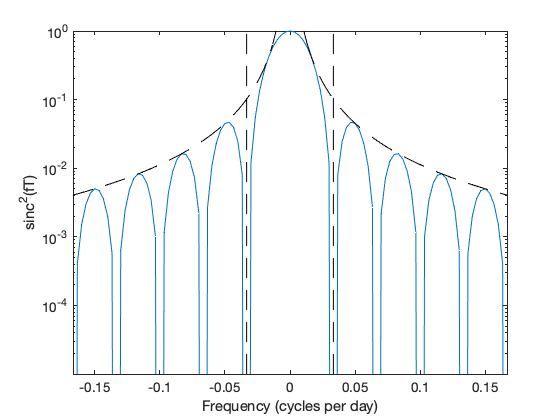

In [89]:
T=30;
df=1/T;
fn=24;
f = linspace(-5,5)./T;
%nanmean(diff(f))
%df
f=-fn:(df/10):fn; %plot finer than our usual frequency res to see response.
    y = sinc(f.*T).^2;
semilogy(f,y,f,1./(pi*f.*T).^2,'k--')    
    ylim([1e-5 1e0])
    xlim([-5 5]/T);
%xlim([-1 1])
    freqline(1/T);
    freqline(-1/T);
    ylabel('sinc^2(fT)')
    xlabel('Frequency (cycles per day)')


So as long as our spectrum has similar energy at all frequencies (a "white" spectrum) the effects of the leakage will be limited, because the sidelobes decay as $1/f^2$.  But if we have a "red" or a "blue" spectrum, we'll have issues:

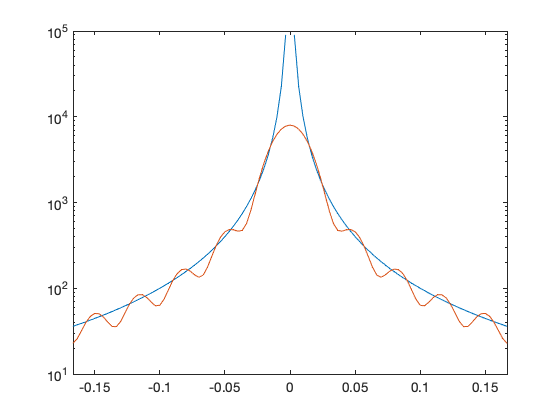

In [123]:
Strue=ones(size(f)); %a white "true" spectrum
Strue=Strue./f.^2;
Strue(find(f==0))=0;
%our response is sinc^2(fT).
%resp=sinc(f.*T).^2;
%Now our estimated spectrum is the convolution of the true spectrum times sinc^2.
%df
Sest=conv(Strue,y,'same')./30;
semilogy(f,Strue,f,Sest(1:length(f)))
    xlim([-5 5]/T);

%plot(Sest./10)
%semilogy(f,resp);
%    xlim([-5 5]/T);


This is why you will sometimes hear of "pre whitening" spectra in order to minimize leakage.  What we mean by this is that if we have a red $f^{-2}$ spectrum, we can effectively multiply it by $f^2$ by differentiating our time series (recall the effect of differentiating on the Fourier coefficients from our previous lecture).  If what we are Fourier transforming has a nearly white spectrum, leakage is minimized.

The side lobes of the window are definitely problematic.  And it turns out
that we're not stuck with them.  If we can widen the central peak of $W$
(the Fourier transform of our window), we can lower the impact of the side
lobes.  To do this, we'll want to forego the rectangular window in the time
domain and choose something that lets us attenuate the beginnings and
ends of each segment of our data.  What if we chose a triangle window?  That
will already give us fewer side lobes.

But we can keep going to find a window that looks more like a Gaussian.
Leading possibilities:

Cosine taper:

$$
w(t)=\cos^\alpha \left(\frac{\pi t}{T}\right)
$$
with $\alpha = [1,4]$.


Hanning window or "raised cosine" window (developed by von Hann):

$$
w(t) = \cos^2\left(\frac{\pi t}{T}\right) = \frac{1 + \cos(2\pi t/T)}{2}
= 0.5 + 0.5\cos(2\pi t/T)
$$

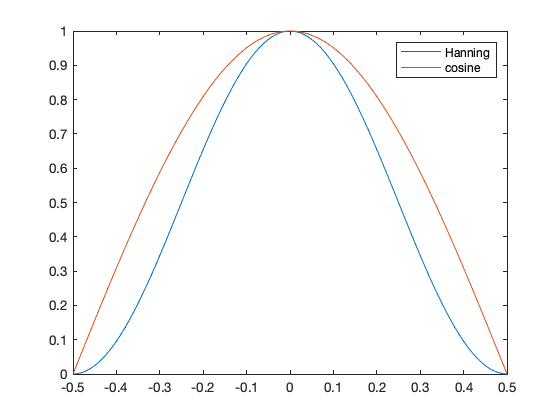

In [138]:
time=-0.5:0.01:0.5;
T=1;
hanwin=cos(pi*time / T).^2;
plot(time,hanwin,time,cos(pi*time/(T)))
legend('Hanning','cosine')